In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lifelines as ll

In [2]:
data = pd.read_csv('loan_timing.csv')
data.head()

,days since origination,days from origination to chargeoff
0,109,NaN
1,679,NaN
2,723,NaN
3,509,NaN
4,254,NaN


In [3]:
data['chargeoff'] = ~data['days from origination to chargeoff'].isna()
data['t'] = data.apply(lambda x: x[0] if not x[2] else x[1], axis=1)
data[9:19]

,days since origination,days from origination to chargeoff,chargeoff,t
9,438,NaN,False,438.0
10,675,NaN,False,675.0
11,336,NaN,False,336.0
12,51,NaN,False,51.0
13,117,NaN,False,117.0
14,327,78.0,True,78.0
15,400,390.0,True,390.0
16,721,362.0,True,362.0
17,562,NaN,False,562.0
18,101,NaN,False,101.0


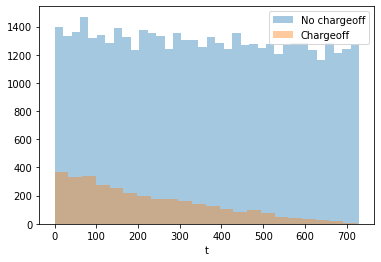

In [4]:
sns.distplot(data[~data.chargeoff]['t'], kde=False, label='No chargeoff')
sns.distplot(data[data.chargeoff]['t'], kde=False, label='Chargeoff')
plt.legend()
plt.show()

In [5]:
survival_data = data[['t', 'chargeoff']].copy()

end_time = 365 * 3
end_time

1095

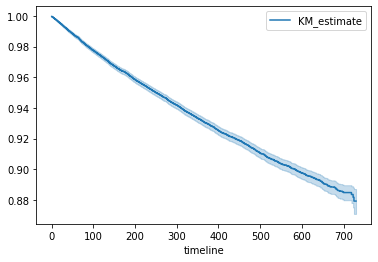

In [6]:
km_model = ll.KaplanMeierFitter().fit(survival_data['t'], survival_data['chargeoff'])

km_model.plot()
plt.show()

In [37]:
survival_data['t'] += 0.01

weibull_model = ll.WeibullFitter().fit(survival_data['t'], survival_data['chargeoff'], timeline=range(end_time + 1))
exponential_model = ll.ExponentialFitter().fit(survival_data['t'], survival_data['chargeoff'], timeline=range(end_time + 1))
lognormal_model = ll.LogNormalFitter().fit(survival_data['t'], survival_data['chargeoff'], timeline=range(end_time + 1))

In [38]:
print(f'Weibull: {weibull_model.AIC_:.{3}f}')
print(f'Exponential: {exponential_model.AIC_:.{3}f}')
print(f'Lognormal: {lognormal_model.AIC_:.{3}f}')

Weibull: 63203.320
Exponential: 63265.773
Lognormal: 63304.728


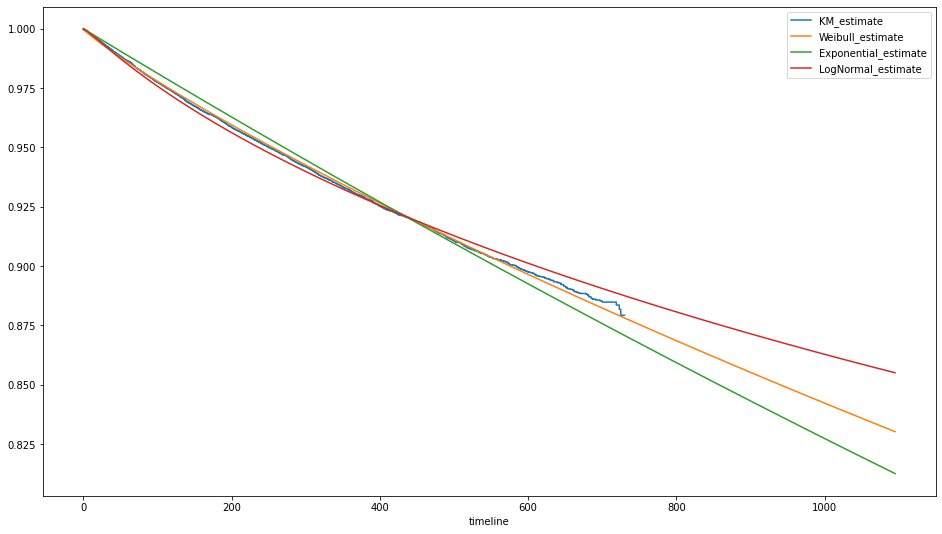

In [39]:
km_model.plot_survival_function(ci_show=False, figsize=(16,9))
weibull_model.plot_survival_function(ci_show=False)
exponential_model.plot_survival_function(ci_show=False)
lognormal_model.plot_survival_function(ci_show=False)
plt.show()

In [46]:
print(f'Survival prediction for {end_time} days: {weibull_model.survival_function_at_times(end_time).squeeze():.{3}f}')
ci = weibull_model.confidence_interval_survival_function_.iloc[-1].squeeze().values
print(f'95% confidence interval: [{ci[0]:.{3}f}, {ci[1]:.{3}f}]')


Survival prediction for 1095 days: 0.830
95% confidence interval: [0.824, 0.837]
